In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Regression Tree</h1>
<p>In this notebook we use decision trees for a regression problem (continuous variable).</p>

<h3>One Dimensional Case</h3>
<p>This first case is just a simple one dimensional regression<br>
Let's take the following distribution :</p>

(4.0, 6.0)

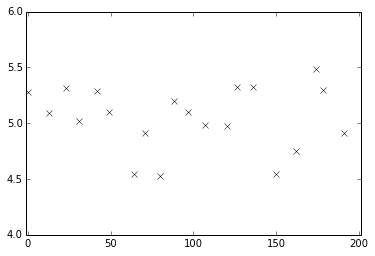

In [2]:
x = np.arange(1,21)*10 + np.random.choice(np.arange(-4,5),20)
x = np.insert(x,0,0)
y = np.random.random(21)+4.5

plt.plot(x,y,'kx')
plt.xlim(-1,201)
plt.ylim(4.0,6.0)

<p>We can perform a decision tree regression considering y as the target values and x as the (only) feature</p>

In [7]:
from sklearn.tree import DecisionTreeRegressor
dtr_1D = DecisionTreeRegressor(min_samples_split=4)
dtr_1D.fit(x.reshape(21,1),y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

<p>To see the regression let's ask for the predicted value for different x :</p>

(4.0, 6.0)

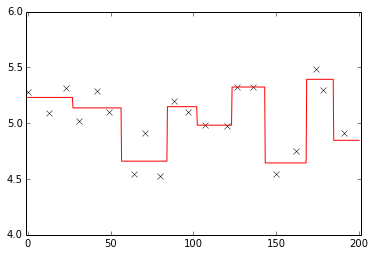

In [9]:
x_pred = np.linspace(0.0,200,601)
y_pred = dtr_1D.predict(x_pred.reshape(601,1))

plt.plot(x,y,'kx')
plt.plot(x_pred,y_pred,'r')
plt.xlim(-1,201)
plt.ylim(4.0,6.0)

<h3>Example using "Boston" dataset</h3>
<p>In the following we use the regression tree technique to a typical house price problem<br>
We use the "Boston" dataset from scikit-learn which contains houses characteristics and their prices. The goal is here to estimate the price of any other house based on its features.</p>
<p>Let's first explore the data.</p>

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
boston['feature_names'] #for full description type : boston['DESCR']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [11]:
data = boston['data']
target = boston['target']

<p>As I want here to limit the study to a smaller number of dimensions (let's say I want to keep two features), I'll first visualize the dataset and try to find correlations between the price and any feature.</p>

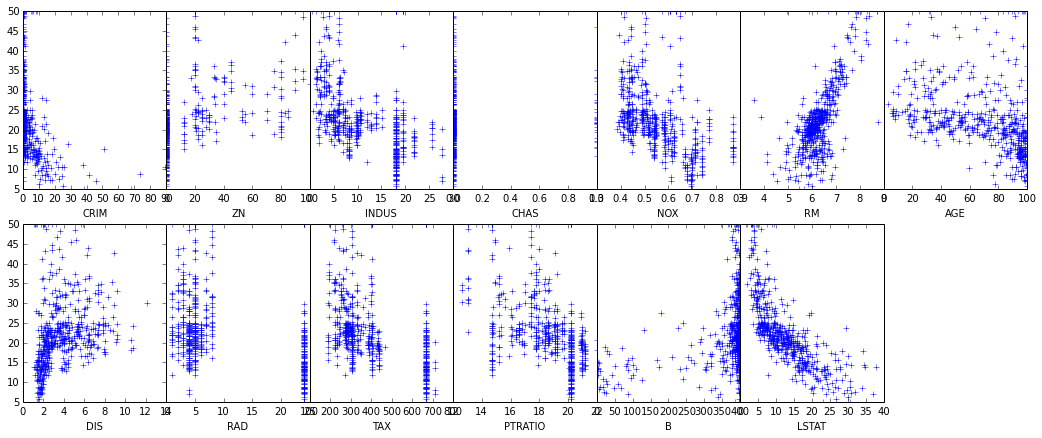

In [15]:
plt.figure(figsize=(18,7))

for i in range(13):
   plt.subplot(2,7,i+1)
   plt.plot(data[:,i],target,'+b')
   plt.xlabel('%s' %boston['feature_names'][i])
   if (i)%7 > 0 :
        plt.yticks([])

plt.subplots_adjust(wspace=0.0)

<p>It appears that the average number of rooms per dwelling (RM) and the proportion of lower status of the population (LSTAT) are correlated to the price of the house (we won't discuss here why).<br>
We can have a closer look :</p>

(0.0, 50)

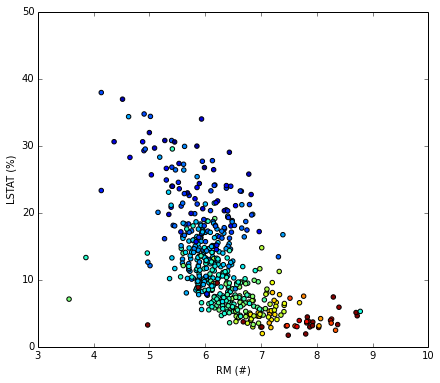

In [21]:
plt.figure(figsize=(7,6))
plt.scatter(data[:,5],data[:,12],c=target)
plt.xlabel('RM (#)')
plt.ylabel('LSTAT (%)')
plt.xlim(3,10)
plt.ylim(0.0,50)

<p>We can now apply the decision tree regression to these two features :</p>

In [22]:
dtr = DecisionTreeRegressor()
dtr.fit(np.c_[data[:,5],data[:,12]],target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

<p>... and visualize the result :</p>

(0.0, 50.0)

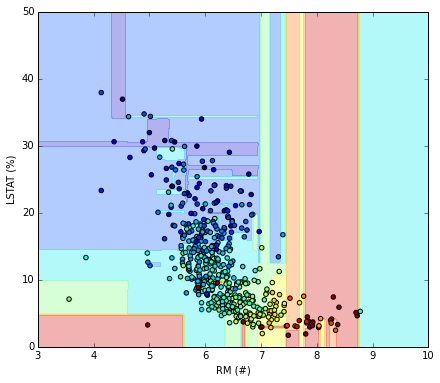

In [26]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,301),np.linspace(0.0,100.0,301))
predic = dtr.predict(np.c_[xx.ravel(),yy.ravel()])
predic = predic.reshape(np.shape(xx))

plt.figure(figsize=(7,6))
plt.contourf(xx,yy,predic,alpha=0.3,linewidths=0.1)
plt.scatter(data[:,5],data[:,12],c=target)
plt.xlabel('RM (#)')
plt.ylabel('LSTAT (%)')
plt.xlim(3,10)
plt.ylim(0.0,50.0)

<p>I strongly encourage you to repeat the operation with different parameters value for the decision tree and see the differences!!!</p>

In [27]:
import pydot
from sklearn.externals.six import StringIO
from sklearn import tree

dot_data = StringIO()
f = tree.export_graphviz(dtr,out_file=dot_data,
                         feature_names=boston.feature_names,
                         class_names=boston.target,
                         filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('regressiontree.pdf')

True